In [40]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [5]:
def uniform_generator(x):
    a = 1597
    c = 25332017
    m = 2**32
    x = (a*x + c)%m
    return x/m, x

In [52]:
def normal_generator(x1, x2):
    u1, x1 = uniform_generator(x1)
    u2, x2 = uniform_generator(x2)
    r = math.sqrt(-2*math.log(u1))
    theta = 2*math.pi*u2
    return r*math.cos(theta), abs(r*math.sin(theta)), x1, x2

In [9]:
# Lab 07
## Q1
x = 42
I = []
for _ in range(10000):
    u, x = uniform_generator(x)
    I.append(math.exp(math.sqrt(u)))

mean = np.mean(I)
var = np.var(I)
mean, var

(1.9960878589797562, 0.1946308317048753)

In [10]:
x = 42
I = []
for _ in range(5000):
    u, x = uniform_generator(x)
    I.append((math.exp(math.sqrt(u)) + math.exp(math.sqrt(1 - u)))/2)

mean = np.mean(I)
var = np.var(I)
mean, var

(1.9998559652122843, 0.0011097363823794762)

In [17]:
x = 42
I = []
for _ in range(10000):
    u, x = uniform_generator(x)
    I.append(math.exp(u))

mean = np.mean(I)
var = np.var(I)
mean, var

(1.713888421102736, 0.24094438917525193)

In [21]:
x = 42
I = []
for _ in range(5000):
    u, x = uniform_generator(x)
    I.append((math.exp(u) + math.exp(1 - u))/2)

mean = np.mean(I)
var = np.var(I)
mean, var

(1.7181533567799812, 0.0039691902137181006)

In [33]:
x = 42
x1 = 12
I = []
b = 1.6903
for _ in range(10000):
    u, x = uniform_generator(x)
    yi = math.exp(u)
    yi_ = yi - b*(u - 1/2)
    I.append(yi_)

mean = np.mean(I)
var = np.var(I)
mean, var

(1.718100168290225, 0.003957654648875727)

In [ ]:
x1 = 42
x2 = 12
x = 37
I = []
count = 0
for _ in range(10000):
    u, x = uniform_generator(x)
    z1, z2, x1, x2 = normal_generator(x1, x2)
    y = -math.log(u) # Generating from the exponential distribution
    z = y + 2*z1
    if(z > 1):
        count += 1

count/10000


0.4907

In [49]:
x = 42
I = []
for _ in range(10000):
    u, x = uniform_generator(x)
    y = -math.log(u) # Generating from the exponential distribution
    I.append(1 - norm.cdf((1 - y)/2))

mean = np.mean(I)
var = np.var(I)
mean, var

(0.4915079072646364, 0.027006264676490577)

In [51]:
x = 42
I = []
for _ in range(10000):
    u, x = uniform_generator(x)
    y = -math.log(u) # Generating from the exponential distribution
    W = (1 - norm.cdf((1 - y)/2))
    I.append((W + 1 - norm.cdf((1 + math.log(1 - u))/2))/2)

mean = np.mean(I)
var = np.var(I)
mean, var

(0.49014885699085153, 0.003105499112697456)

In [ ]:
P = {1: 0.19, 2: 0.26, 3: 0.24, 4: 0.17, 5: 0.14}

In [58]:
# integral 0 -> inf e^-x.dx = 1
from tqdm import tqdm
I = []
x = 42
x1 = 12
x2 = 37
for _ in tqdm(range(100000000)):
    z1, z2, x1, x2 = normal_generator(x1, x2)
    I.append(math.sqrt(math.pi/2)*math.exp(-z2)*math.exp((z2**2)/2))

est = np.mean(I)
est

100%|██████████| 100000000/100000000 [01:42<00:00, 975910.67it/s]


0.9977407717708057

In [54]:
I = []
x = 42
for _ in range(100000):
    u, x = uniform_generator(x)
    I.append(-math.log(u))

mean = np.mean(I)
mean

0.9999334778425256

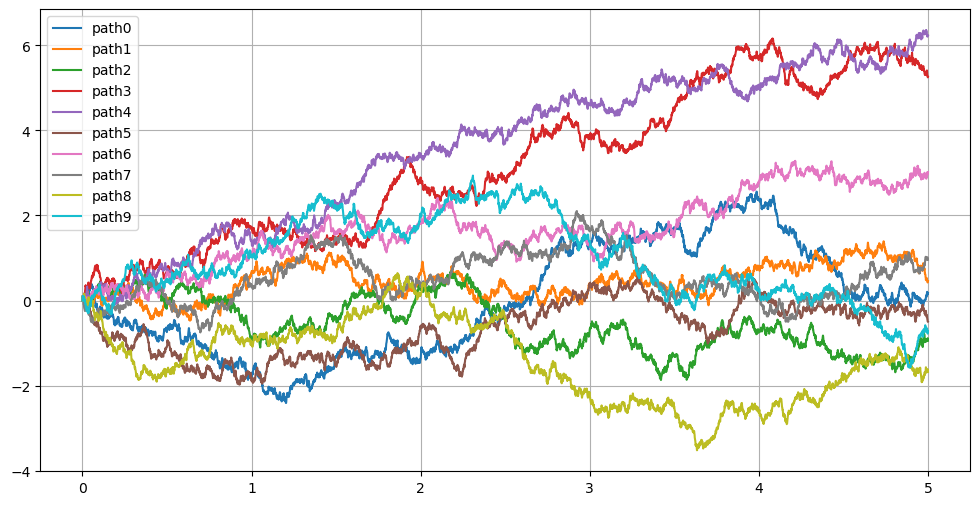

In [70]:
w = []
seeds = [42, 12, 437, 57, 23, 78, 68, 89, 543, 100]
for _ in range (10):
    W = []
    W0 = 0
    t = [i*0.001 for i in range(5001)]
    W.append(W0)
    x1 = seeds[_]
    x2 = seeds[(_ + 3)%10]
    for i in range(5000):
        z1, z2, x1, x2 = normal_generator(x1, x2)
        W.append(W[i] + math.sqrt(t[i+1] - t[i])*z1)
    w.append(W)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(t, w[i], label=f'path{i}')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
def poisson_generator1(x, l=1):
    p = math.exp(-l)
    F = p
    N = 0
    u, x = uniform_generator(x)
    while(u > F):
        N += 1
        p = l*p/N 
        F += p
    return N, x 

(array([3.6830e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.6839e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8465e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.9950e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

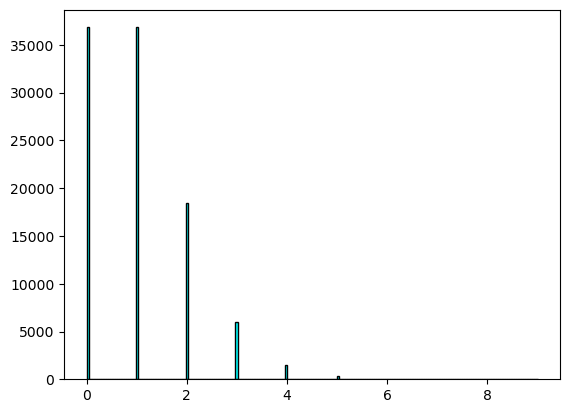

In [79]:
x = 42
I = []
for i in range(100000):
    p, x = poisson_generator1(x)
    I.append(p)
plt.hist(I, bins = 200, edgecolor='black', color='cyan')


In [87]:
def poisson_generator(x, lam=1):
    L = math.exp(-lam)
    k = 0
    p = 1
    while(p > L):
        u, x = uniform_generator(x)
        p *= u
        k += 1
    return k - 1, x

100%|██████████| 10000/10000 [00:00<00:00, 74409.71it/s]


(array([   7.,   44.,   83.,  263.,  271.,  812.,  735., 1477., 1125.,
        1640., 1444.,  641.,  729.,  303.,  265.,   72.,   56.,   17.,
          14.,    2.]),
 array([27.  , 29.55, 32.1 , 34.65, 37.2 , 39.75, 42.3 , 44.85, 47.4 ,
        49.95, 52.5 , 55.05, 57.6 , 60.15, 62.7 , 65.25, 67.8 , 70.35,
        72.9 , 75.45, 78.  ]),
 <BarContainer object of 20 artists>)

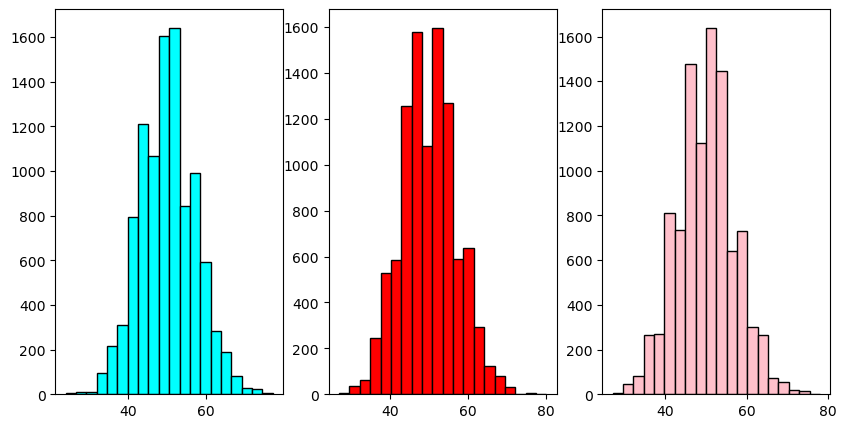

In [99]:
x = 42
x1 - 42
I = []
w = []
q = []
N = 10000
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
for i in tqdm(range(N)):
    p, x = poisson_generator(x, 50)
    p1, x1 = poisson_generator1(x1, 50)
    I.append(p)
    w.append(p1)
q = np.random.poisson(lam=50, size=N)
ax[0].hist(I, bins=20, edgecolor='black', color='cyan')
ax[1].hist(q, bins=20, edgecolor='black', color='red')
ax[2].hist(w, bins=20, edgecolor='black', color='pink')

In [ ]:
X0 = 5
mu = 0.06
sigma = 0.3
x = []
j = []
t = [i*0.001 for i in range(1001)]
x1 = 42
x2 = 12
x = 37
x3 = 12
x4 = 97
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize=(12, 6))
for path in tqdm(range(5)):
    X = []
    Jump = []
    X.append(X0)
    Jump.append(X0)
    for i in tqdm(range(1000)):
        z1, z2, x1, x2 = normal_generator(x1, x2)
        X.append(X[i] + (mu - (sigma**2)/2)*(t[i+1] - t[i]) + sigma*(z1*(math.sqrt(t[i+1] - t[i]))))
        l, x = poisson_generator(x, lam=(0.5*(t[i+1] - t[i])))
        m = 0
        while(l > 0):
            z3, z4, x3, x4 = normal_generator(x3, x4)
            m += math.log(0.1*z3 + 1)
        Jump.append(X[i+1] + m)
    axs[path].plot(t, X, label='w/o jumps', linestyle='dashed')
    axs[path].plot(t, Jump, label='w/ jumps',)


100%|██████████| 1000/1000 [00:00<00:00, 558644.65it/s]
